In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt

from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import SGD
import numpy as np

print(tf.__version__)
print(tf.keras.__version__)

2.4.1
2.4.0


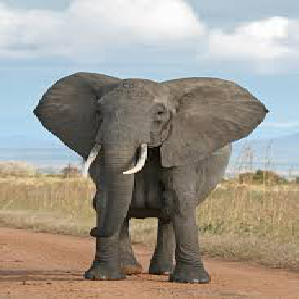

In [2]:
image = load_img('sample_image.jpg', target_size=(299,299))
image

In [3]:
array = img_to_array(image)
array = array.reshape((1, array.shape[0], array.shape[1], array.shape[2]))
array = preprocess_input(array)
array

array([[[[ 0.49803925,  0.60784316,  0.6784314 ],
         [ 0.49803925,  0.60784316,  0.6784314 ],
         [ 0.48235297,  0.5921569 ,  0.6627451 ],
         ...,
         [ 0.39607847,  0.54509807,  0.654902  ],
         [ 0.39607847,  0.54509807,  0.654902  ],
         [ 0.39607847,  0.54509807,  0.654902  ]],

        [[ 0.5294118 ,  0.6392157 ,  0.70980394],
         [ 0.5294118 ,  0.6392157 ,  0.70980394],
         [ 0.5137255 ,  0.62352943,  0.69411767],
         ...,
         [ 0.39607847,  0.54509807,  0.654902  ],
         [ 0.39607847,  0.54509807,  0.654902  ],
         [ 0.39607847,  0.54509807,  0.654902  ]],

        [[ 0.58431375,  0.7019608 ,  0.75686276],
         [ 0.58431375,  0.7019608 ,  0.75686276],
         [ 0.56078434,  0.6784314 ,  0.73333335],
         ...,
         [ 0.39607847,  0.54509807,  0.654902  ],
         [ 0.39607847,  0.54509807,  0.654902  ],
         [ 0.39607847,  0.54509807,  0.654902  ]],

        ...,

        [[ 0.3803922 ,  0.13725495, -0

In [4]:
model = InceptionV3()
model.summary()
model.predict

                 
__________________________________________________________________________________________________
batch_normalization_63 (BatchNo (None, 17, 17, 192)  576         conv2d_63[0][0]                  
__________________________________________________________________________________________________
batch_normalization_68 (BatchNo (None, 17, 17, 192)  576         conv2d_68[0][0]                  
__________________________________________________________________________________________________
batch_normalization_69 (BatchNo (None, 17, 17, 192)  576         conv2d_69[0][0]                  
__________________________________________________________________________________________________
activation_60 (Activation)      (None, 17, 17, 192)  0           batch_normalization_60[0][0]     
__________________________________________________________________________________________________
activation_63 (Activation)      (None, 17, 17, 192)  0           batch_normalization_63[0][

<bound method Model.predict of <tensorflow.python.keras.engine.functional.Functional object at 0x0000021F50C47EB0>>

In [5]:
model_layers = model.layers
model_layers.pop()  # model.layers will get a shadow copy, model.layers.pop does not work properly.
model = Model(inputs=model.inputs, outputs=model_layers[-1].output)
model.summary()

d_6[0][0]        
__________________________________________________________________________________________________
batch_normalization_60 (BatchNo (None, 17, 17, 192)  576         conv2d_60[0][0]                  
__________________________________________________________________________________________________
batch_normalization_63 (BatchNo (None, 17, 17, 192)  576         conv2d_63[0][0]                  
__________________________________________________________________________________________________
batch_normalization_68 (BatchNo (None, 17, 17, 192)  576         conv2d_68[0][0]                  
__________________________________________________________________________________________________
batch_normalization_69 (BatchNo (None, 17, 17, 192)  576         conv2d_69[0][0]                  
__________________________________________________________________________________________________
activation_60 (Activation)      (None, 17, 17, 192)  0           batch_normalization_60[0][

In [6]:
features = model.predict(array)

In [7]:
print(features.shape)

(1, 2048)


In [8]:
import pickle
pickle.dump(features, open('elephant.pkl', 'wb'))

In [9]:
model = InceptionV3(include_top=False)
model.summary()

][0]             
__________________________________________________________________________________________________
conv2d_163 (Conv2D)             (None, None, None, 1 147456      average_pooling2d_15[0][0]       
__________________________________________________________________________________________________
batch_normalization_154 (BatchN (None, None, None, 1 576         conv2d_154[0][0]                 
__________________________________________________________________________________________________
batch_normalization_157 (BatchN (None, None, None, 1 576         conv2d_157[0][0]                 
__________________________________________________________________________________________________
batch_normalization_162 (BatchN (None, None, None, 1 576         conv2d_162[0][0]                 
__________________________________________________________________________________________________
batch_normalization_163 (BatchN (None, None, None, 1 576         conv2d_163[0][0]          

In [10]:
print(model.output)
print(model.outputs)

KerasTensor(type_spec=TensorSpec(shape=(None, None, None, 2048), dtype=tf.float32, name=None), name='mixed10/concat:0', description="created by layer 'mixed10'")
[<KerasTensor: shape=(None, None, None, 2048) dtype=float32 (created by layer 'mixed10')>]


In [11]:
model = InceptionV3(weights='imagenet', include_top=False)
out = model.output
print(out)

KerasTensor(type_spec=TensorSpec(shape=(None, None, None, 2048), dtype=tf.float32, name=None), name='mixed10/concat:0', description="created by layer 'mixed10'")


In [12]:
flat1 = GlobalAveragePooling2D()(out)
class1 = Dense(1024, activation='relu', name = 'dense')(flat1)
output = Dense(10, activation='softmax', name = 'output')(class1)
new_model = Model(inputs=model.inputs, outputs=output)
new_model.summary()

                 
__________________________________________________________________________________________________
batch_normalization_256 (BatchN (None, None, None, 1 576         conv2d_256[0][0]                 
__________________________________________________________________________________________________
batch_normalization_257 (BatchN (None, None, None, 1 576         conv2d_257[0][0]                 
__________________________________________________________________________________________________
activation_248 (Activation)     (None, None, None, 1 0           batch_normalization_248[0][0]    
__________________________________________________________________________________________________
activation_251 (Activation)     (None, None, None, 1 0           batch_normalization_251[0][0]    
__________________________________________________________________________________________________
activation_256 (Activation)     (None, None, None, 1 0           batch_normalization_256[0]

In [13]:
for layer in new_model.layers[:-3]:
    layer.trainable = False
new_model.summary()

              
__________________________________________________________________________________________________
batch_normalization_256 (BatchN (None, None, None, 1 576         conv2d_256[0][0]                 
__________________________________________________________________________________________________
batch_normalization_257 (BatchN (None, None, None, 1 576         conv2d_257[0][0]                 
__________________________________________________________________________________________________
activation_248 (Activation)     (None, None, None, 1 0           batch_normalization_248[0][0]    
__________________________________________________________________________________________________
activation_251 (Activation)     (None, None, None, 1 0           batch_normalization_251[0][0]    
__________________________________________________________________________________________________
activation_256 (Activation)     (None, None, None, 1 0           batch_normalization_256[0][0]

In [14]:
new_model.compile()

In [15]:
new_model.summary()

              
__________________________________________________________________________________________________
batch_normalization_256 (BatchN (None, None, None, 1 576         conv2d_256[0][0]                 
__________________________________________________________________________________________________
batch_normalization_257 (BatchN (None, None, None, 1 576         conv2d_257[0][0]                 
__________________________________________________________________________________________________
activation_248 (Activation)     (None, None, None, 1 0           batch_normalization_248[0][0]    
__________________________________________________________________________________________________
activation_251 (Activation)     (None, None, None, 1 0           batch_normalization_251[0][0]    
__________________________________________________________________________________________________
activation_256 (Activation)     (None, None, None, 1 0           batch_normalization_256[0][0]